In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data=pd.read_csv('./dataset/kidney_disease.csv')

In [73]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,yes
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,yes
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,yes
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,yes
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,yes


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [75]:
(data.isnull().sum() / data.shape[0] * 100.00).round(2)

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

### Transform column names

In [76]:
data.drop('id', axis = 1, inplace = True)

In [77]:
data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'classification']

In [78]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,yes
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,yes
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,yes


In [79]:
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')

In [80]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

data['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace = '\tno', value='no')


data['classification'] = data['classification'].map({'no': 0, 'yes': 1})
data['classification'] = pd.to_numeric(data['classification'], errors='coerce')
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in cat_cols:
    print('{} has {} values '.format(col,data[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values 


pus_cell has ['normal' 'abnormal' nan] values 


pus_cell_clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


hypertension has ['yes' 'no' nan] values 


diabetes_mellitus has ['yes' 'no' nan] values 


coronary_artery_disease has ['no' 'yes' nan] values 


appetite has ['good' 'poor' nan] values 


peda_edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 




In [81]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']
num_cols = num_cols[:-1]
print(cat_cols)
print(num_cols)

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia']
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


### Replace NaN values

In [82]:
def mean_value_imputation(feature):
    mean = data[feature].mean()
    data[feature] = data[feature].fillna(mean)
    
    
for col in num_cols:
    mean_value_imputation(col)


In [83]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=11)
imputer.fit_transform(data[num_cols])

def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)
    
for col in cat_cols:
    impute_mode(col)

In [84]:
(data.isnull().sum() / data.shape[0] * 100.00).round(2)

age                        0.0
blood_pressure             0.0
specific_gravity           0.0
albumin                    0.0
sugar                      0.0
red_blood_cells            0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
blood_glucose_random       0.0
blood_urea                 0.0
serum_creatinine           0.0
sodium                     0.0
potassium                  0.0
haemoglobin                0.0
packed_cell_volume         0.0
white_blood_cell_count     0.0
red_blood_cell_count       0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
peda_edema                 0.0
anemia                     0.0
classification             0.0
dtype: float64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [87]:
x=data[['age','blood_pressure','pus_cell_clumps','bacteria','serum_creatinine','haemoglobin','potassium','sodium','pus_cell','red_blood_cells','specific_gravity']]
y=data['classification']

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [90]:
import pickle
with open('standSc.pkl', 'wb') as file:
    pickle.dump(sc, file)

### Logistic Regression 

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
le=LogisticRegression()
le.fit(x_train,y_train)
pred=le.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
aclr=accuracy_score(y_test,pred)
aclr=aclr*100
print("The accuracy of logistic regression:",aclr)
loss=mean_squared_error(y_test,pred)
print("The mse of logistic regression:",loss)

The accuracy of logistic regression: 92.5
The mse of logistic regression: 0.075


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.91      0.96      0.93        45

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80



### Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(max_depth=50, random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [95]:
acrf=accuracy_score(y_test,y_pred)
acrf=acrf*100
print("The accuracy of Random Forest classifier:",acrf)
loss=mean_squared_error(y_test,y_pred)
print("The mse of logistic regression:",loss)

The accuracy of Random Forest classifier: 88.75
The mse of logistic regression: 0.1125


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        35
           1       0.86      0.96      0.91        45

    accuracy                           0.89        80
   macro avg       0.90      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



### KNN Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predkn=knn.predict(x_test)

In [98]:
ackn=accuracy_score(y_test,predkn)
ackn=ackn*100
print("Thre accuracy of kneighborsclassifier:",ackn)
loss=mean_squared_error(y_test,predkn)
print("The mse of logistic regression:",loss)

Thre accuracy of kneighborsclassifier: 83.75
The mse of logistic regression: 0.1625


In [99]:
print(classification_report(y_test, predkn))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.85      0.87      0.86        45

    accuracy                           0.84        80
   macro avg       0.84      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80



In [100]:
model=pd.DataFrame({'logistic  ':aclr,'random_forest':acrf,'knn':ackn},index=['accuracy'])
model

,logistic,random_forest,knn
accuracy,92.5,88.75,83.75


In [101]:
models=list(model.keys())
scores=[aclr,acrf,ackn]

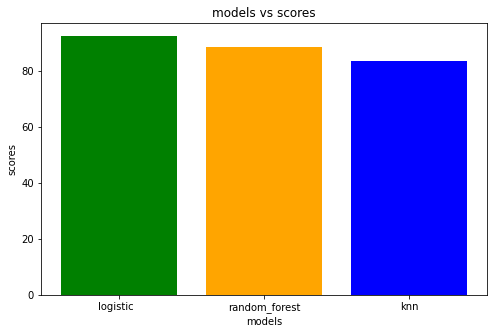

In [102]:
fig=plt.figure(figsize=(8,5))
plt.bar(models,scores,color=['green','orange','blue'],width=0.8)
plt.xlabel('models')
plt.ylabel('scores')
plt.title('models vs scores')
plt.show()

In [103]:
from sklearn.metrics import confusion_matrix

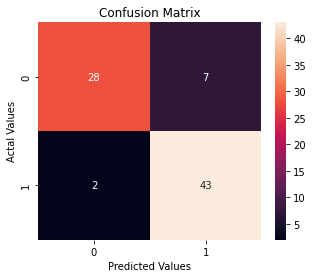

In [104]:
cm_df=confusion_matrix(y_test,y_pred )
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Saving models

In [105]:
import pickle
log_reg_model = "log_reg.pkl"
rand_for_model= "ran_for.pkl"

with open(log_reg_model, 'wb') as file:
    pickle.dump(le, file)

with open(rand_for_model, 'wb') as f:
    pickle.dump(clf, f)
print("Model successfully created......!")  

Model successfully created......!
